<a href="https://colab.research.google.com/github/Ajeet-Yadav782000/mini_project/blob/main/major_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import pandas as pd
table=pd.read_csv('/content/COVID-19 Cases(24-12-2020).csv')
m=table.iloc[287:10116]
m

,S. No.,Date,Region,Confirmed Cases,Active Cases,Cured/Discharged,Death
287,288,27/03/2020,Andaman and Nicobar Islands,1,1,0.0,0.0
288,289,28/03/2020,Andaman and Nicobar Islands,6,6,0.0,0.0
289,290,29/03/2020,Andaman and Nicobar Islands,9,9,0.0,0.0
290,291,30/03/2020,Andaman and Nicobar Islands,9,9,0.0,0.0
291,292,31/03/2020,Andaman and Nicobar Islands,10,10,0.0,0.0
...,...,...,...,...,...,...,...
10111,10112,20/12/2020,West Bengal,534850,18460,507070.0,9320.0
10112,10113,21/12/2020,West Bengal,536828,17771,509697.0,9360.0
10113,10114,22/12/2020,West Bengal,538343,16903,512039.0,9401.0
10114,10115,23/12/2020,West Bengal,539996,16248,514309.0,9439.0


In [43]:
# worst affected state
m["Confirmed Cases"].max()


1906371

In [45]:
m[m["Confirmed Cases"]==m["Confirmed Cases"].max()]

,S. No.,Date,Region,Confirmed Cases,Active Cases,Cured/Discharged,Death
5971,5972,24/12/2020,Maharashtra,1906371,55702,1801700.0,48969.0


In [46]:
# - Highest Active cases
m["Active Cases"].max()


302135

In [47]:
m[m["Active Cases"]==m["Active Cases"].max()]

,S. No.,Date,Region,Confirmed Cases,Active Cases,Cured/Discharged,Death
5875,5876,18/09/2020,Maharashtra,1145840,302135,812354.0,31351.0


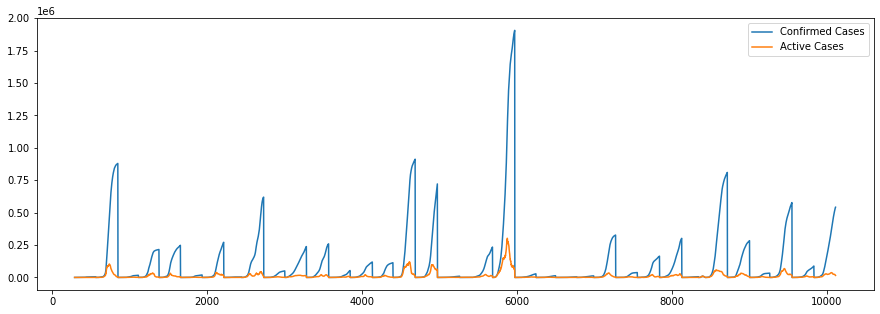

In [49]:
# Peak of various states
m.plot(y=["Confirmed Cases","Active Cases"],figsize=(15,5))


In [51]:
# Highest cured state
m[m["Cured/Discharged"]==m["Cured/Discharged"].max()]

,S. No.,Date,Region,Confirmed Cases,Active Cases,Cured/Discharged,Death
5971,5972,24/12/2020,Maharashtra,1906371,55702,1801700.0,48969.0


In [54]:
# Bar Chart Race for Active Cases
! pip install bar_chart_race


In [58]:
import pandas as pd
table=pd.read_csv('/content/COVID-19 Cases(24-12-2020).csv',index_col="Date")


In [59]:
import bar_chart_race as bcr

In [ ]:
bcr.bar_chart_race(df=table,n_bars=10,filter_column_colors=True,title="COVID19 Active cases")

In [72]:
df_new=m[["Date","Active Cases"]]
df_new=df_new.rename(columns={"Date":"ds","Active Cases":"y"})
df_new.to_csv("active cases",index=False)

In [73]:
# forecasting
import fbprophet
aj=fbprophet.Prophet()
aj.fit(df_new)




INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [78]:
forecast=aj.make_future_dataframe(periods=12,freq="M")
forecast.columns
forecast=aj.predict(forecast)

In [79]:
forecast[["ds","yhat","yhat_lower","yhat_upper"]]

,ds,yhat,yhat_lower,yhat_upper
0,2020-01-04,11809.707628,-22581.795138,45190.437363
1,2020-01-05,12273.860062,-20536.812279,46802.340582
2,2020-01-06,12496.286676,-21598.540402,49339.332064
3,2020-01-07,12487.753364,-20876.010286,44447.299695
4,2020-01-08,12428.101281,-20416.301457,45014.964243
...,...,...,...,...
294,2021-07-31,-25266.102617,-64536.868399,13720.409051
295,2021-08-31,-28962.958243,-71933.297829,10599.380491
296,2021-09-30,-33244.109209,-76671.776280,9426.830604
297,2021-10-31,-38435.869549,-87211.201268,5298.406058


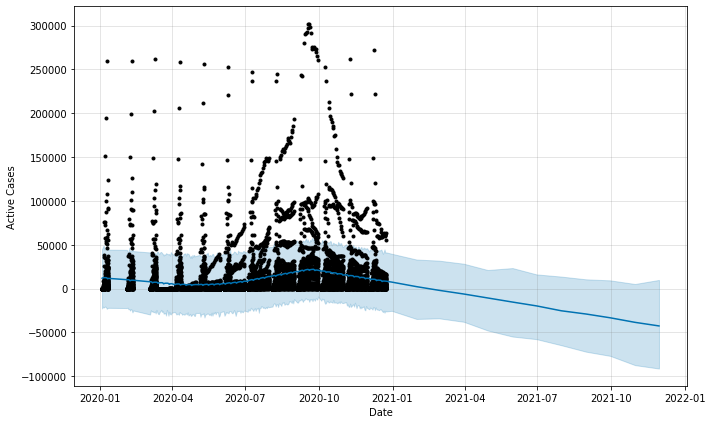

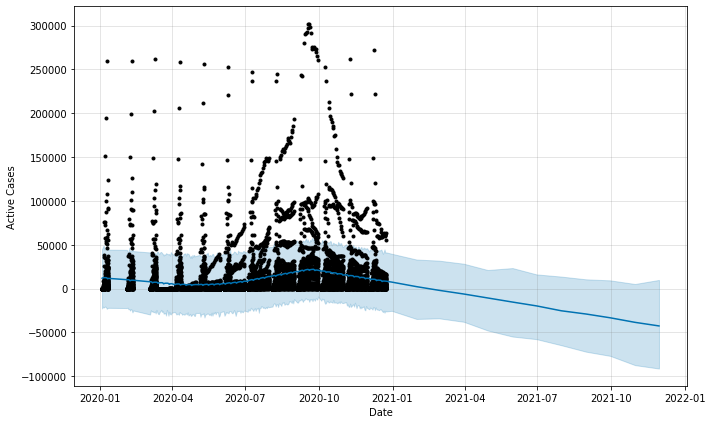

In [81]:
aj.plot(forecast,xlabel="Date",ylabel="Active Cases")